# WeatherPy

In [94]:
# Dependencies, Libraries & more
import pandas as pd
import json
import requests
import numpy as np
import matplotlib.pyplot as plt
from citipy import citipy # Why?

In [95]:
# Create city list
cities = []
# Create coordinates list
coordinates = []
# Generate 800 random latitudes and 800 random longitudes
# Longitud +/- 180 from the Equator
lon = np.random.uniform(low=-180.0000, high=180.0000, size=1400)
# Latitud +/- 90 from Greenwich Meridian
lat = np.random.uniform(low=-90.0000, high=90.0000, size=1400)
# Join the two random lists
coordinates = zip(lat, lon)
# Find nearest city for longitude latitude combos and if it is first timer include in the list
for coord in coordinates:
    city = citipy.nearest_city(coord[0], coord[1]).city_name
    if city not in cities:
        cities.append(city.title())

# API Calls for Temperature, Humidity, Cloudiness & Windspeed

In [102]:
# Import API key
from llaves import api_key

# Output File (CSV)
output_data = "weather_df.csv"

# Weather config
weathurl = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
# # define url

# Build partial query URL
q_url_1 = f"{weathurl}appid={api_key}&units={units}&q="
# query_url = f"http://api.openweathermap.org/data/2.5/weather?appid={api_key}&units={temp_units}&q="

# Lists
city_selection = []
countries = []
hi_temps = []
humidities = []
clouds = []
winds_sp = []
dates = []
lats = []
lons = []
i = 1

# Create a loop to feed the city list
for city in cities:
    q_url_2 = q_url_1 + city
    response = requests.get(q_url_2).json()
    
    try:
        country = response['sys']['country']
        hi_temp = response['main']['temp_max']
        humidity = response['main']['humidity']
        cloud = response['clouds']['all']
        wind_sp = response['wind']['speed']
        date = response['dt']
        lat = response['coord']['lat']
        lon = response['coord']['lon']

    except:
        country = np.nan
        hi_temp = np.nan
        humidity = np.nan
        cloud = np.nan
        wind_sp = np.nan
        date = np.nan
        lat = np.nan
        lon = np.nan

    countries.append(country)
    dates.append(date)
    lats.append(lat)                                          
    lons.append(lon)
    hi_temps.append(hi_temp)
    humidities.append(humidity)
    clouds.append(cloud)
    winds_sp.append(wind_sp)
        
    # Print the data being processed
    print (f"{i}: {city} --> Country: {country} Coordinates: {lat},{lon} Max Temp: {hi_temp}, Humidity: {humidity}, Cloudiness: {cloud}, Wind Speed: {wind_sp}")
    i+=1

1: Sisophon --> Country: KH Coordinates: 13.5859,102.9737 Max Temp: 26.92, Humidity: 78, Cloudiness: 91, Wind Speed: 2.67
2: San Cristobal --> Country: VE Coordinates: 7.7669,-72.225 Max Temp: 24, Humidity: 100, Cloudiness: 75, Wind Speed: 1.54
3: Cam Ranh --> Country: VN Coordinates: 11.9214,109.1591 Max Temp: 29, Humidity: 65, Cloudiness: 20, Wind Speed: 2.06
4: Taolanaro --> Country: nan Coordinates: nan,nan Max Temp: nan, Humidity: nan, Cloudiness: nan, Wind Speed: nan
5: Yellowknife --> Country: CA Coordinates: 62.456,-114.3525 Max Temp: -1.11, Humidity: 59, Cloudiness: 75, Wind Speed: 6.17
6: Lebu --> Country: CL Coordinates: -37.6167,-73.65 Max Temp: 12.83, Humidity: 94, Cloudiness: 100, Wind Speed: 3.42
7: San Juan --> Country: AR Coordinates: -31.5375,-68.5364 Max Temp: 20.39, Humidity: 38, Cloudiness: 0, Wind Speed: 1.11
8: Rikitea --> Country: PF Coordinates: -23.1203,-134.9692 Max Temp: 24.79, Humidity: 66, Cloudiness: 77, Wind Speed: 5.37
9: Port Alfred --> Country: ZA Coo

69: Khatanga --> Country: RU Coordinates: 71.9667,102.5 Max Temp: 0.11, Humidity: 93, Cloudiness: 100, Wind Speed: 3.11
70: Alveringem --> Country: BE Coordinates: 50.9793,2.6775 Max Temp: 4.44, Humidity: 93, Cloudiness: 69, Wind Speed: 0.51
71: Punta Arenas --> Country: CL Coordinates: -53.15,-70.9167 Max Temp: 5, Humidity: 93, Cloudiness: 90, Wind Speed: 3.6
72: Albany --> Country: US Coordinates: 42.6001,-73.9662 Max Temp: 12.78, Humidity: 90, Cloudiness: 100, Wind Speed: 3.42
73: Hobart --> Country: AU Coordinates: -42.8794,147.3294 Max Temp: 17.78, Humidity: 77, Cloudiness: 20, Wind Speed: 4.12
74: Arraial Do Cabo --> Country: BR Coordinates: -22.9661,-42.0278 Max Temp: 22.14, Humidity: 72, Cloudiness: 9, Wind Speed: 4.19
75: Lebu --> Country: CL Coordinates: -37.6167,-73.65 Max Temp: 12.83, Humidity: 94, Cloudiness: 100, Wind Speed: 3.42
76: Toliary --> Country: nan Coordinates: nan,nan Max Temp: nan, Humidity: nan, Cloudiness: nan, Wind Speed: nan
77: Barrow --> Country: US Coor

139: Port Alfred --> Country: ZA Coordinates: -33.5906,26.891 Max Temp: 17.32, Humidity: 72, Cloudiness: 100, Wind Speed: 6.34
140: Yellowknife --> Country: CA Coordinates: 62.456,-114.3525 Max Temp: -1.11, Humidity: 59, Cloudiness: 75, Wind Speed: 6.17
141: Lebu --> Country: CL Coordinates: -37.6167,-73.65 Max Temp: 12.83, Humidity: 94, Cloudiness: 100, Wind Speed: 3.42
142: Hilo --> Country: US Coordinates: 19.7297,-155.09 Max Temp: 28, Humidity: 61, Cloudiness: 20, Wind Speed: 5.14
143: Punta Arenas --> Country: CL Coordinates: -53.15,-70.9167 Max Temp: 5, Humidity: 93, Cloudiness: 90, Wind Speed: 3.6
144: Beloha --> Country: MG Coordinates: -25.1667,45.05 Max Temp: 22.02, Humidity: 69, Cloudiness: 0, Wind Speed: 2.74
145: Klaksvik --> Country: FO Coordinates: 62.2266,-6.589 Max Temp: 3, Humidity: 60, Cloudiness: 90, Wind Speed: 4.12
146: Ayan --> Country: RU Coordinates: 56.45,138.1667 Max Temp: 0.52, Humidity: 73, Cloudiness: 100, Wind Speed: 6.43
147: New Norfolk --> Country: AU 

207: Seoul --> Country: KR Coordinates: 37.5683,126.9778 Max Temp: 12, Humidity: 71, Cloudiness: 75, Wind Speed: 1.54
208: Provideniya --> Country: RU Coordinates: 64.3833,-173.3 Max Temp: 1, Humidity: 69, Cloudiness: 40, Wind Speed: 1
209: Arraial Do Cabo --> Country: BR Coordinates: -22.9661,-42.0278 Max Temp: 22.14, Humidity: 72, Cloudiness: 9, Wind Speed: 4.19
210: New Norfolk --> Country: AU Coordinates: -42.7826,147.0587 Max Temp: 18.33, Humidity: 70, Cloudiness: 8, Wind Speed: 1.79
211: Pakokku --> Country: MM Coordinates: 21.3333,95.1 Max Temp: 30.58, Humidity: 51, Cloudiness: 4, Wind Speed: 2.88
212: Attawapiskat --> Country: nan Coordinates: nan,nan Max Temp: nan, Humidity: nan, Cloudiness: nan, Wind Speed: nan
213: Lagoa --> Country: PT Coordinates: 39.05,-27.9833 Max Temp: 13.73, Humidity: 62, Cloudiness: 100, Wind Speed: 2.76
214: Ribeira Grande --> Country: PT Coordinates: 38.5167,-28.7 Max Temp: 14.25, Humidity: 65, Cloudiness: 100, Wind Speed: 4.58
215: Vaitupu --> Coun

275: Illoqqortoormiut --> Country: nan Coordinates: nan,nan Max Temp: nan, Humidity: nan, Cloudiness: nan, Wind Speed: nan
276: Vaini --> Country: TO Coordinates: -21.2,-175.2 Max Temp: 24, Humidity: 100, Cloudiness: 90, Wind Speed: 3.6
277: Talnakh --> Country: RU Coordinates: 69.4865,88.3972 Max Temp: -1.17, Humidity: 92, Cloudiness: 90, Wind Speed: 1.68
278: Atuona --> Country: PF Coordinates: -9.8,-139.0333 Max Temp: 26.41, Humidity: 68, Cloudiness: 5, Wind Speed: 1.97
279: Thompson --> Country: CA Coordinates: 55.7435,-97.8558 Max Temp: 1, Humidity: 40, Cloudiness: 20, Wind Speed: 7.2
280: Kabare --> Country: CD Coordinates: -2.4683,28.8242 Max Temp: 15.42, Humidity: 97, Cloudiness: 99, Wind Speed: 0.54
281: Nizhneyansk --> Country: nan Coordinates: nan,nan Max Temp: nan, Humidity: nan, Cloudiness: nan, Wind Speed: nan
282: Baghmara --> Country: IN Coordinates: 23.795,86.2085 Max Temp: 28.95, Humidity: 44, Cloudiness: 0, Wind Speed: 3.07
283: Avarua --> Country: CK Coordinates: -2

343: Kaitangata --> Country: NZ Coordinates: -46.2817,169.8464 Max Temp: 13.33, Humidity: 55, Cloudiness: 85, Wind Speed: 6.71
344: Stokmarknes --> Country: NO Coordinates: 68.5646,14.9108 Max Temp: 1.11, Humidity: 82, Cloudiness: 57, Wind Speed: 4.57
345: Vostok --> Country: RU Coordinates: 46.4856,135.8833 Max Temp: 11.83, Humidity: 28, Cloudiness: 64, Wind Speed: 2.63
346: Albany --> Country: US Coordinates: 42.6001,-73.9662 Max Temp: 12.78, Humidity: 90, Cloudiness: 100, Wind Speed: 3.42
347: Vaini --> Country: TO Coordinates: -21.2,-175.2 Max Temp: 24, Humidity: 100, Cloudiness: 90, Wind Speed: 3.6
348: Havelock --> Country: US Coordinates: 34.8791,-76.9013 Max Temp: 22.22, Humidity: 68, Cloudiness: 1, Wind Speed: 8.23
349: Salalah --> Country: OM Coordinates: 17.0151,54.0924 Max Temp: 28, Humidity: 83, Cloudiness: 75, Wind Speed: 3.09
350: Ushuaia --> Country: AR Coordinates: -54.8,-68.3 Max Temp: 5, Humidity: 65, Cloudiness: 40, Wind Speed: 2.06
351: Taolanaro --> Country: nan C

411: Ancud --> Country: CL Coordinates: -41.8697,-73.8203 Max Temp: 13.89, Humidity: 88, Cloudiness: 75, Wind Speed: 7.2
412: Tumannyy --> Country: nan Coordinates: nan,nan Max Temp: nan, Humidity: nan, Cloudiness: nan, Wind Speed: nan
413: Punta Arenas --> Country: CL Coordinates: -53.15,-70.9167 Max Temp: 5, Humidity: 93, Cloudiness: 90, Wind Speed: 3.6
414: Codrington --> Country: AU Coordinates: -38.2667,141.9667 Max Temp: 20.65, Humidity: 44, Cloudiness: 0, Wind Speed: 4.74
415: Gat --> Country: IL Coordinates: 31.61,34.7642 Max Temp: 18, Humidity: 77, Cloudiness: 0, Wind Speed: 1.54
416: Clyde River --> Country: CA Coordinates: 70.4692,-68.5914 Max Temp: -4, Humidity: 100, Cloudiness: 90, Wind Speed: 5.66
417: Torbay --> Country: CA Coordinates: 47.6666,-52.7314 Max Temp: 3.33, Humidity: 81, Cloudiness: 1, Wind Speed: 2.57
418: Illoqqortoormiut --> Country: nan Coordinates: nan,nan Max Temp: nan, Humidity: nan, Cloudiness: nan, Wind Speed: nan
419: Kahului --> Country: US Coordin

480: Henties Bay --> Country: NA Coordinates: -22.116,14.2845 Max Temp: 12.78, Humidity: 86, Cloudiness: 0, Wind Speed: 0.45
481: Sechura --> Country: PE Coordinates: -5.5569,-80.8222 Max Temp: 21.84, Humidity: 71, Cloudiness: 2, Wind Speed: 7.6
482: Deer Lake --> Country: CA Coordinates: 49.1667,-57.4316 Max Temp: 6, Humidity: 75, Cloudiness: 75, Wind Speed: 1.23
483: Nikolskoye --> Country: RU Coordinates: 59.7035,30.7861 Max Temp: 0, Humidity: 74, Cloudiness: 0, Wind Speed: 1.08
484: Aktash --> Country: RU Coordinates: 50.3,87.7333 Max Temp: 6.67, Humidity: 59, Cloudiness: 82, Wind Speed: 2.33
485: Yarada --> Country: IN Coordinates: 17.65,83.2667 Max Temp: 25, Humidity: 94, Cloudiness: 40, Wind Speed: 2.57
486: Punta Arenas --> Country: CL Coordinates: -53.15,-70.9167 Max Temp: 5, Humidity: 93, Cloudiness: 90, Wind Speed: 3.6
487: Hobart --> Country: AU Coordinates: -42.8794,147.3294 Max Temp: 17.78, Humidity: 77, Cloudiness: 20, Wind Speed: 4.12
488: Sharlyk --> Country: RU Coordi

549: Atuona --> Country: PF Coordinates: -9.8,-139.0333 Max Temp: 26.41, Humidity: 68, Cloudiness: 5, Wind Speed: 1.97
550: Kapaa --> Country: US Coordinates: 22.0752,-159.319 Max Temp: 25.56, Humidity: 59, Cloudiness: 12, Wind Speed: 0.45
551: Port Blair --> Country: IN Coordinates: 11.6667,92.75 Max Temp: 28.09, Humidity: 74, Cloudiness: 100, Wind Speed: 2.15
552: Turukhansk --> Country: RU Coordinates: 65.8167,87.9833 Max Temp: 1.34, Humidity: 96, Cloudiness: 100, Wind Speed: 5.24
553: Carnarvon --> Country: AU Coordinates: -24.8667,113.6333 Max Temp: 22, Humidity: 83, Cloudiness: 93, Wind Speed: 5.66
554: Arraial Do Cabo --> Country: BR Coordinates: -22.9661,-42.0278 Max Temp: 22.14, Humidity: 72, Cloudiness: 9, Wind Speed: 4.19
555: Taltal --> Country: CL Coordinates: -25.4,-70.4833 Max Temp: 17.75, Humidity: 79, Cloudiness: 0, Wind Speed: 1.59
556: Nacala --> Country: MZ Coordinates: -14.5428,40.6728 Max Temp: 22.85, Humidity: 97, Cloudiness: 36, Wind Speed: 2.55
557: Cabo San Lu

618: Ulladulla --> Country: AU Coordinates: -35.35,150.4667 Max Temp: 18.33, Humidity: 68, Cloudiness: 0, Wind Speed: 3.6
619: Hermanus --> Country: ZA Coordinates: -34.4187,19.2345 Max Temp: 9.44, Humidity: 93, Cloudiness: 50, Wind Speed: 2.19
620: Mogzon --> Country: RU Coordinates: 51.7435,111.9606 Max Temp: 1.86, Humidity: 57, Cloudiness: 100, Wind Speed: 3.87
621: Gweru --> Country: ZW Coordinates: -19.45,29.8167 Max Temp: 15.27, Humidity: 64, Cloudiness: 5, Wind Speed: 2.84
622: Hasaki --> Country: JP Coordinates: 35.7333,140.8333 Max Temp: 22.22, Humidity: 46, Cloudiness: 20, Wind Speed: 4.12
623: Fairbanks --> Country: US Coordinates: 64.8378,-147.7164 Max Temp: 10, Humidity: 46, Cloudiness: 90, Wind Speed: 3.09
624: Golden --> Country: US Coordinates: 39.7555,-105.2211 Max Temp: 20, Humidity: 24, Cloudiness: 40, Wind Speed: 2.57
625: Belyy Yar --> Country: RU Coordinates: 53.6039,91.3903 Max Temp: 6, Humidity: 100, Cloudiness: 75, Wind Speed: 0.5
626: Husavik --> Country: IS C

687: Jandaia Do Sul --> Country: BR Coordinates: -23.6031,-51.6433 Max Temp: 20, Humidity: 49, Cloudiness: 0, Wind Speed: 4.63
688: Kaitangata --> Country: NZ Coordinates: -46.2817,169.8464 Max Temp: 13.33, Humidity: 55, Cloudiness: 85, Wind Speed: 6.71
689: Butaritari --> Country: KI Coordinates: 3.0707,172.7902 Max Temp: 28.94, Humidity: 72, Cloudiness: 100, Wind Speed: 6.16
690: La Paz --> Country: BO Coordinates: -16.5,-68.15 Max Temp: 6, Humidity: 70, Cloudiness: 40, Wind Speed: 4.63
691: Falealupo --> Country: nan Coordinates: nan,nan Max Temp: nan, Humidity: nan, Cloudiness: nan, Wind Speed: nan
692: Chase --> Country: CA Coordinates: 50.8165,-119.6857 Max Temp: 17.22, Humidity: 72, Cloudiness: 100, Wind Speed: 1.03
693: Norman Wells --> Country: CA Coordinates: 65.282,-126.8329 Max Temp: 8, Humidity: 31, Cloudiness: 20, Wind Speed: 2.57
694: Ust-Nera --> Country: RU Coordinates: 64.5667,143.2 Max Temp: 2.3, Humidity: 97, Cloudiness: 99, Wind Speed: 1.05
695: Hermanus --> Countr

755: Comodoro Rivadavia --> Country: AR Coordinates: -45.8667,-67.5 Max Temp: 19, Humidity: 45, Cloudiness: 0, Wind Speed: 4.12
756: Manono --> Country: CD Coordinates: -7.3,27.4167 Max Temp: 20.44, Humidity: 91, Cloudiness: 99, Wind Speed: 1.58
757: Ushuaia --> Country: AR Coordinates: -54.8,-68.3 Max Temp: 5, Humidity: 65, Cloudiness: 40, Wind Speed: 2.06
758: Albany --> Country: US Coordinates: 42.6001,-73.9662 Max Temp: 12.78, Humidity: 90, Cloudiness: 100, Wind Speed: 3.42
759: Mataura --> Country: NZ Coordinates: -46.1927,168.8643 Max Temp: 12.22, Humidity: 75, Cloudiness: 70, Wind Speed: 7.15
760: Kavieng --> Country: PG Coordinates: -2.5744,150.7967 Max Temp: 29.26, Humidity: 69, Cloudiness: 40, Wind Speed: 3.23
761: Taolanaro --> Country: nan Coordinates: nan,nan Max Temp: nan, Humidity: nan, Cloudiness: nan, Wind Speed: nan
762: Qaanaaq --> Country: GL Coordinates: 77.484,-69.3632 Max Temp: -2.95, Humidity: 65, Cloudiness: 100, Wind Speed: 4.17
763: Sao Filipe --> Country: CV

822: Mullaitivu --> Country: nan Coordinates: nan,nan Max Temp: nan, Humidity: nan, Cloudiness: nan, Wind Speed: nan
823: Albany --> Country: US Coordinates: 42.6001,-73.9662 Max Temp: 12.78, Humidity: 90, Cloudiness: 100, Wind Speed: 3.42
824: Atuona --> Country: PF Coordinates: -9.8,-139.0333 Max Temp: 26.41, Humidity: 68, Cloudiness: 5, Wind Speed: 1.97
825: Darhan --> Country: MN Coordinates: 49.4867,105.9228 Max Temp: 4.09, Humidity: 61, Cloudiness: 85, Wind Speed: 1.89
826: Castro --> Country: BR Coordinates: -24.7911,-50.0119 Max Temp: 10.33, Humidity: 96, Cloudiness: 1, Wind Speed: 2.23
827: Xichang --> Country: CN Coordinates: 27.8964,102.2634 Max Temp: 18.6, Humidity: 45, Cloudiness: 91, Wind Speed: 0.6
828: Ushuaia --> Country: AR Coordinates: -54.8,-68.3 Max Temp: 5, Humidity: 65, Cloudiness: 40, Wind Speed: 2.06
829: Xining --> Country: CN Coordinates: 36.6167,101.7667 Max Temp: 12.04, Humidity: 25, Cloudiness: 6, Wind Speed: 1.44
830: Barrow --> Country: US Coordinates: 7

891: Zdvinsk --> Country: RU Coordinates: 54.7021,78.661 Max Temp: 6.2, Humidity: 69, Cloudiness: 0, Wind Speed: 3.18
892: Atuona --> Country: PF Coordinates: -9.8,-139.0333 Max Temp: 26.41, Humidity: 68, Cloudiness: 5, Wind Speed: 1.97
893: Mataura --> Country: NZ Coordinates: -46.1927,168.8643 Max Temp: 12.22, Humidity: 75, Cloudiness: 70, Wind Speed: 7.15
894: Arraial Do Cabo --> Country: BR Coordinates: -22.9661,-42.0278 Max Temp: 22.14, Humidity: 72, Cloudiness: 9, Wind Speed: 4.19
895: Shingu --> Country: JP Coordinates: 33.7333,135.9833 Max Temp: 18, Humidity: 63, Cloudiness: 20, Wind Speed: 2.57
896: Kamenskoye --> Country: nan Coordinates: nan,nan Max Temp: nan, Humidity: nan, Cloudiness: nan, Wind Speed: nan
897: Los Llanos De Aridane --> Country: ES Coordinates: 28.6585,-17.9182 Max Temp: 18, Humidity: 72, Cloudiness: 20, Wind Speed: 1.54
898: Hobart --> Country: AU Coordinates: -42.8794,147.3294 Max Temp: 17.78, Humidity: 77, Cloudiness: 20, Wind Speed: 4.12
899: Fort Nelso

960: Fenoarivo --> Country: MG Coordinates: -18.933,47.4354 Max Temp: 17, Humidity: 94, Cloudiness: 75, Wind Speed: 3.09
961: Rikitea --> Country: PF Coordinates: -23.1203,-134.9692 Max Temp: 24.79, Humidity: 66, Cloudiness: 77, Wind Speed: 5.37
962: Tuktoyaktuk --> Country: CA Coordinates: 69.4541,-133.0374 Max Temp: -2, Humidity: 69, Cloudiness: 1, Wind Speed: 6.17
963: Bredasdorp --> Country: ZA Coordinates: -34.5322,20.0403 Max Temp: 8, Humidity: 87, Cloudiness: 0, Wind Speed: 0.51
964: Grand River South East --> Country: nan Coordinates: nan,nan Max Temp: nan, Humidity: nan, Cloudiness: nan, Wind Speed: nan
965: Arraial Do Cabo --> Country: BR Coordinates: -22.9661,-42.0278 Max Temp: 22.14, Humidity: 72, Cloudiness: 9, Wind Speed: 4.19
966: Jamestown --> Country: US Coordinates: 42.097,-79.2353 Max Temp: 8.33, Humidity: 100, Cloudiness: 90, Wind Speed: 4.12
967: New Norfolk --> Country: AU Coordinates: -42.7826,147.0587 Max Temp: 18.33, Humidity: 70, Cloudiness: 8, Wind Speed: 1.7

1027: Bathsheba --> Country: BB Coordinates: 13.2167,-59.5167 Max Temp: 25, Humidity: 65, Cloudiness: 20, Wind Speed: 7.72
1028: Vaitupu --> Country: nan Coordinates: nan,nan Max Temp: nan, Humidity: nan, Cloudiness: nan, Wind Speed: nan
1029: Busselton --> Country: AU Coordinates: -33.65,115.3333 Max Temp: 11.11, Humidity: 99, Cloudiness: 22, Wind Speed: 3.74
1030: Dasoguz --> Country: TM Coordinates: 41.8363,59.9666 Max Temp: 14, Humidity: 82, Cloudiness: 0, Wind Speed: 5.14
1031: Bur Gabo --> Country: nan Coordinates: nan,nan Max Temp: nan, Humidity: nan, Cloudiness: nan, Wind Speed: nan
1032: Belushya Guba --> Country: nan Coordinates: nan,nan Max Temp: nan, Humidity: nan, Cloudiness: nan, Wind Speed: nan
1033: Osakarovka --> Country: KZ Coordinates: 50.565,72.5692 Max Temp: 6.94, Humidity: 63, Cloudiness: 100, Wind Speed: 4.07
1034: Jamestown --> Country: US Coordinates: 42.097,-79.2353 Max Temp: 8.33, Humidity: 100, Cloudiness: 90, Wind Speed: 4.12
1035: Hermanus --> Country: ZA 

1094: Dingle --> Country: PH Coordinates: 10.9995,122.6711 Max Temp: 29.58, Humidity: 46, Cloudiness: 9, Wind Speed: 2.42
1095: Busselton --> Country: AU Coordinates: -33.65,115.3333 Max Temp: 11.11, Humidity: 99, Cloudiness: 22, Wind Speed: 3.74
1096: Kodiak --> Country: US Coordinates: 57.79,-152.4072 Max Temp: 5, Humidity: 87, Cloudiness: 90, Wind Speed: 1.54
1097: Arraial Do Cabo --> Country: BR Coordinates: -22.9661,-42.0278 Max Temp: 22.14, Humidity: 72, Cloudiness: 9, Wind Speed: 4.19
1098: Punta Arenas --> Country: CL Coordinates: -53.15,-70.9167 Max Temp: 5, Humidity: 93, Cloudiness: 90, Wind Speed: 3.6
1099: Samusu --> Country: nan Coordinates: nan,nan Max Temp: nan, Humidity: nan, Cloudiness: nan, Wind Speed: nan
1100: Santa Cruz --> Country: BO Coordinates: -17.8,-63.1667 Max Temp: 18.28, Humidity: 51, Cloudiness: 3, Wind Speed: 2.15
1101: Paracuru --> Country: BR Coordinates: -3.41,-39.0306 Max Temp: 27, Humidity: 78, Cloudiness: 40, Wind Speed: 1.54
1102: Constantine --> 

1162: Mataura --> Country: NZ Coordinates: -46.1927,168.8643 Max Temp: 12.22, Humidity: 75, Cloudiness: 70, Wind Speed: 7.15
1163: Ushuaia --> Country: AR Coordinates: -54.8,-68.3 Max Temp: 5, Humidity: 65, Cloudiness: 40, Wind Speed: 2.06
1164: Chuncheng --> Country: CN Coordinates: 22.1731,111.7886 Max Temp: 26.67, Humidity: 56, Cloudiness: 99, Wind Speed: 0.28
1165: Rikitea --> Country: PF Coordinates: -23.1203,-134.9692 Max Temp: 24.79, Humidity: 66, Cloudiness: 77, Wind Speed: 5.37
1166: Rikitea --> Country: PF Coordinates: -23.1203,-134.9692 Max Temp: 24.79, Humidity: 66, Cloudiness: 77, Wind Speed: 5.37
1167: Bredasdorp --> Country: ZA Coordinates: -34.5322,20.0403 Max Temp: 8, Humidity: 87, Cloudiness: 0, Wind Speed: 0.51
1168: Lazaro Cardenas --> Country: MX Coordinates: 17.9583,-102.2 Max Temp: 25.96, Humidity: 76, Cloudiness: 100, Wind Speed: 4.13
1169: Gorontalo --> Country: ID Coordinates: 0.5412,123.0595 Max Temp: 30.68, Humidity: 62, Cloudiness: 85, Wind Speed: 0.61
1170

1230: Sovetskaya Gavan --> Country: RU Coordinates: 48.9723,140.2878 Max Temp: 1.67, Humidity: 95, Cloudiness: 100, Wind Speed: 3.91
1231: Okhotsk --> Country: RU Coordinates: 59.3833,143.3 Max Temp: 3.44, Humidity: 76, Cloudiness: 84, Wind Speed: 0.52
1232: Punta Arenas --> Country: CL Coordinates: -53.15,-70.9167 Max Temp: 5, Humidity: 93, Cloudiness: 90, Wind Speed: 3.6
1233: East London --> Country: ZA Coordinates: -33.0153,27.9116 Max Temp: 17.63, Humidity: 81, Cloudiness: 100, Wind Speed: 5.42
1234: Bredasdorp --> Country: ZA Coordinates: -34.5322,20.0403 Max Temp: 8, Humidity: 87, Cloudiness: 0, Wind Speed: 0.51
1235: Tyup --> Country: KG Coordinates: 42.7276,78.3648 Max Temp: 13.04, Humidity: 37, Cloudiness: 0, Wind Speed: 1
1236: Labuhan --> Country: ID Coordinates: -6.8844,112.2051 Max Temp: 27.09, Humidity: 78, Cloudiness: 31, Wind Speed: 2.65
1237: Asilah --> Country: MA Coordinates: 35.465,-6.0348 Max Temp: 12, Humidity: 4, Cloudiness: 0, Wind Speed: 1.03
1238: Qaanaaq -->

1298: Angoche --> Country: MZ Coordinates: -16.2325,39.9086 Max Temp: 24.56, Humidity: 87, Cloudiness: 10, Wind Speed: 1.18
1299: Chagda --> Country: nan Coordinates: nan,nan Max Temp: nan, Humidity: nan, Cloudiness: nan, Wind Speed: nan
1300: Thompson --> Country: CA Coordinates: 55.7435,-97.8558 Max Temp: 1, Humidity: 40, Cloudiness: 20, Wind Speed: 7.2
1301: Bereda --> Country: ES Coordinates: 43.2686,-7.5406 Max Temp: 7.22, Humidity: 99, Cloudiness: 87, Wind Speed: 0.45
1302: Hobart --> Country: AU Coordinates: -42.8794,147.3294 Max Temp: 17.78, Humidity: 77, Cloudiness: 20, Wind Speed: 4.12
1303: Ushuaia --> Country: AR Coordinates: -54.8,-68.3 Max Temp: 5, Humidity: 65, Cloudiness: 40, Wind Speed: 2.06
1304: Jamestown --> Country: US Coordinates: 42.097,-79.2353 Max Temp: 8.33, Humidity: 100, Cloudiness: 90, Wind Speed: 4.12
1305: Punta Arenas --> Country: CL Coordinates: -53.15,-70.9167 Max Temp: 5, Humidity: 93, Cloudiness: 90, Wind Speed: 3.6
1306: Hobart --> Country: AU Coord

1367: Vaini --> Country: TO Coordinates: -21.2,-175.2 Max Temp: 24, Humidity: 100, Cloudiness: 90, Wind Speed: 3.6
1368: Sitka --> Country: US Coordinates: 57.0531,-135.33 Max Temp: 8, Humidity: 81, Cloudiness: 90, Wind Speed: 4.63
1369: Tuktoyaktuk --> Country: CA Coordinates: 69.4541,-133.0374 Max Temp: -2, Humidity: 69, Cloudiness: 1, Wind Speed: 6.17
1370: Cape Town --> Country: ZA Coordinates: -33.9258,18.4232 Max Temp: 15, Humidity: 82, Cloudiness: 20, Wind Speed: 3.6
1371: Garowe --> Country: SO Coordinates: 8.4054,48.4845 Max Temp: 25.04, Humidity: 78, Cloudiness: 100, Wind Speed: 3
1372: Kiama --> Country: AU Coordinates: -34.6833,150.8667 Max Temp: 21.67, Humidity: 70, Cloudiness: 0, Wind Speed: 0.89
1373: Albany --> Country: US Coordinates: 42.6001,-73.9662 Max Temp: 12.78, Humidity: 90, Cloudiness: 100, Wind Speed: 3.42
1374: Tiksi --> Country: RU Coordinates: 71.6872,128.8694 Max Temp: -0.13, Humidity: 81, Cloudiness: 83, Wind Speed: 2.64
1375: Guerrero Negro --> Country: 

# What's the weather like as we approach the equator?

In [103]:
# Create Dictionary and then a DataFrame
dicto = {
    "City": cities,
    "Cloudiness": clouds,
    "Country": countries,
    "Date": dates,
    "Humidity": humidities,
    "Lat": lats,
    "Lon": lons,
    "Hi Temp": hi_temps,
    "Wind Speed": winds_sp
}
weather_df = pd.DataFrame(dicto)
weather_df.to_csv(output_data)
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lon,Hi Temp,Wind Speed
0,Sisophon,91.0,KH,1.619744e+09,78.0,13.5859,102.9737,26.92,2.67
1,San Cristobal,75.0,VE,1.619744e+09,100.0,7.7669,-72.2250,24.00,1.54
2,Cam Ranh,20.0,VN,1.619744e+09,65.0,11.9214,109.1591,29.00,2.06
3,Taolanaro,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Yellowknife,75.0,CA,1.619744e+09,59.0,62.4560,-114.3525,-1.11,6.17


# The first requirement is to create a series of scatter plots to showcase the following relationships:

* Temperature (F) vs. Latitude
* Humidity (%) vs. Latitude
* Cloudiness (%) vs. Latitude
* Wind Speed (mph) vs. Latitude

# Create a series of scatter plots to showcase required relationships

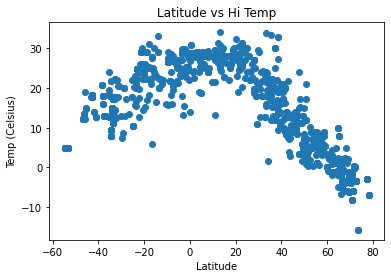

In [104]:
# Temperature (F) vs. Latitude
plt.scatter(weather_df["Lat"],weather_df["Hi Temp"])
plt.title("Latitude vs Hi Temp")
plt.xlabel("Latitude")
plt.ylabel("Temp (Celsius)")
plt.savefig("Lat_Temp.png")
plt.show()

The graph shows there is a negative correlation between the distance of a city from the Equator.  The highes temperature of the day increases as the distance from the Equator decreases.

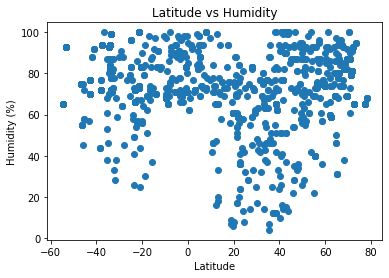

In [105]:
# Humidity (%) vs. Latitude
plt.scatter(weather_df["Lat"],weather_df["Humidity"])
plt.title("Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig("Lat_Humidity.png")
plt.show()

There is no observable correlation between latitude and humidity.  Humidity may have higher correlations with other variables as altitude and distance from massive water bodies.

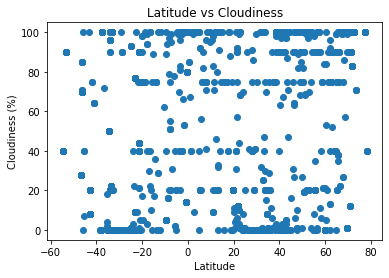

In [106]:
# Cloudiness (%) vs. Latitude
plt.scatter(weather_df["Lat"],weather_df["Cloudiness"])
plt.title("Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("Lat_Cloudiness.png")
plt.show()

There is no apparent correlation between cloud formations and latitude.

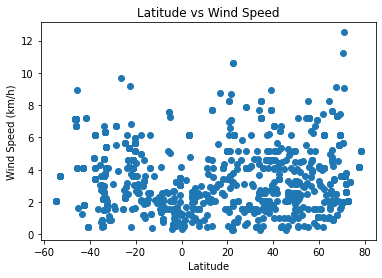

In [107]:
# Wind Speed (mph) vs. Latitude
plt.scatter(weather_df["Lat"],weather_df["Wind Speed"])
plt.title("Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (km/h)")
plt.savefig("Lat_WindSpeed.png")
plt.show()

There is no observable correlation between wind speed and latitude.

# The second requirement is to run linear regression on each relationship. This time, separate the plots into Northern Hemisphere (greater than or equal to 0 degrees latitude) and Southern Hemisphere (less than 0 degrees latitude):

* Northern Hemisphere - Temperature (F) vs. Latitude
* Southern Hemisphere - Temperature (F) vs. Latitude
* Northern Hemisphere - Humidity (%) vs. Latitude
* Southern Hemisphere - Humidity (%) vs. Latitude
* Northern Hemisphere - Cloudiness (%) vs. Latitude
* Southern Hemisphere - Cloudiness (%) vs. Latitude
* Northern Hemisphere - Wind Speed (mph) vs. Latitude
* Southern Hemisphere - Wind Speed (mph) vs. Latitude

In [ ]:
# Northern Hemisphere - Temperature (F) vs. Latitude
